# Numpy-only 2-layer Neural Network for Binary Classification

## Using UCI Heart Disease Dataset

### Imports and EDA

In [1]:
# Import libraries
import csv
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from neural_net import NeuralNet

In [32]:
# Define header names

headers = ['age', 'sex','chest_pain','resting_blood_pressure',  
        'serum_cholestoral', 'fasting_blood_sugar', 'resting_ecg_results',
        'max_heart_rate_achieved', 'exercise_induced_angina', 'oldpeak',"slope of the peak",
        'num_of_major_vessels','thal', 'heart_disease']

# Make DF

heart_df = pd.read_csv('heart.dat', sep = ' ', names = headers)

In [33]:
# Check shape of DF

heart_df.shape

(270, 14)

In [34]:
# Check for na's

heart_df.isna().sum()

age                        0
sex                        0
chest_pain                 0
resting_blood_pressure     0
serum_cholestoral          0
fasting_blood_sugar        0
resting_ecg_results        0
max_heart_rate_achieved    0
exercise_induced_angina    0
oldpeak                    0
slope of the peak          0
num_of_major_vessels       0
thal                       0
heart_disease              0
dtype: int64

In [35]:
# Check datatypes

heart_df.dtypes

age                        float64
sex                        float64
chest_pain                 float64
resting_blood_pressure     float64
serum_cholestoral          float64
fasting_blood_sugar        float64
resting_ecg_results        float64
max_heart_rate_achieved    float64
exercise_induced_angina    float64
oldpeak                    float64
slope of the peak          float64
num_of_major_vessels       float64
thal                       float64
heart_disease                int64
dtype: object

In [36]:
# Define training set

X = heart_df.drop(columns = ['heart_disease'])

# Enumerate target class i.e. labels
heart_df['heart_disease'] = heart_df['heart_disease'].replace(1,0)
heart_df['heart_disease'] = heart_df['heart_disease'].replace(2,1)

y_label = heart_df['heart_disease'].values.reshape(X.shape[0], 1)

# Make train-test split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y_label, test_size = 0.2, random_state = 2)

In [37]:
# Scale values

sc = StandardScaler()
sc.fit(Xtrain)
Xtrain = sc.transform(Xtrain)
Xtest = sc.transform(Xtest)

print(f"Shape of train set is {Xtrain.shape}")
print(f"Shape of test set is {Xtest.shape}")
print(f"Shape of train label is {ytrain.shape}")
print(f"Shape of test labels is {ytest.shape}")

Shape of train set is (216, 13)
Shape of test set is (54, 13)
Shape of train label is (216, 1)
Shape of test labels is (54, 1)


### Train Model and Use it to Predict

In [38]:
# Instantiate class of Neural Net using default parameters

nn = NeuralNet()

In [39]:
# Fit model

nn.fit(Xtrain, ytrain)

Training epoch 0, calculated loss: 1.406818099455712
Training epoch 1, calculated loss: 1.2283644538724772
Training epoch 2, calculated loss: 1.1027579343396263
Training epoch 3, calculated loss: 1.010277834670556
Training epoch 4, calculated loss: 0.9375456811690593
Training epoch 5, calculated loss: 0.8771342674193834
Training epoch 6, calculated loss: 0.8256029193292977
Training epoch 7, calculated loss: 0.7809976438171825
Training epoch 8, calculated loss: 0.7419983603962279
Training epoch 9, calculated loss: 0.707447080573352
Training epoch 10, calculated loss: 0.6761308099914313
Training epoch 11, calculated loss: 0.6479719529677453
Training epoch 12, calculated loss: 0.6225758410329949
Training epoch 13, calculated loss: 0.5995873203513066
Training epoch 14, calculated loss: 0.5787978131048888
Training epoch 15, calculated loss: 0.5599182115487729
Training epoch 16, calculated loss: 0.5427118970422696
Training epoch 17, calculated loss: 0.5270878681118275
Training epoch 18, calc

Training epoch 338, calculated loss: 0.17169346297302743
Training epoch 339, calculated loss: 0.17145706532276012
Training epoch 340, calculated loss: 0.1711999783518241
Training epoch 341, calculated loss: 0.17097264265344975
Training epoch 342, calculated loss: 0.17072128054425517
Training epoch 343, calculated loss: 0.17048209845709925
Training epoch 344, calculated loss: 0.17023203315163624
Training epoch 345, calculated loss: 0.1699941945008134
Training epoch 346, calculated loss: 0.16974128122812893
Training epoch 347, calculated loss: 0.16948323256936773
Training epoch 348, calculated loss: 0.16924536060296808
Training epoch 349, calculated loss: 0.16898732423520862
Training epoch 350, calculated loss: 0.1687340466210543
Training epoch 351, calculated loss: 0.16847927733185036
Training epoch 352, calculated loss: 0.16825200969880444
Training epoch 353, calculated loss: 0.1680184489296365
Training epoch 354, calculated loss: 0.16775547357820084
Training epoch 355, calculated loss

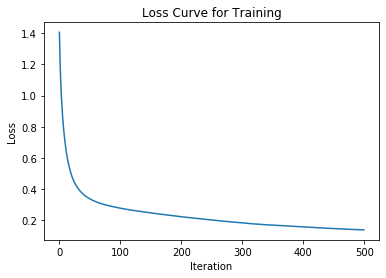

In [40]:
# Plot model loss

nn.plot_loss()

In [41]:
# Use models to predict

train_pred = nn.predict(Xtrain)
test_pred = nn.predict(Xtest)

In [42]:
# Get accuracy of predictions

print("Train accuracy is {}%".format(nn.accuracy(ytrain, train_pred)))
print("Test accuracy is {}%".format(nn.accuracy(ytest, test_pred)))

Train accuracy is 94%
Test accuracy is 68%


## Using Banknote Authentication Dataset

In [2]:
import numpy as np

In [3]:
# Read in dataframe

banknote_df = pd.read_csv('data_banknote_authentication.txt', sep = ',', names = ['variance', 'skewness', 'kurtosis', 'entropy', 'classification'])

In [4]:
# Check shape of DF

banknote_df.shape

(1372, 5)

In [5]:
# Check for na's

banknote_df.isna().sum()

variance          0
skewness          0
kurtosis          0
entropy           0
classification    0
dtype: int64

In [6]:
# Check datatypes

banknote_df.dtypes

variance          float64
skewness          float64
kurtosis          float64
entropy           float64
classification      int64
dtype: object

In [7]:
# Define training set

X = np.array(banknote_df.drop(columns = ['classification']))

y_label = banknote_df['classification'].values.reshape(X.shape[0], 1)

# Make train-test split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y_label, test_size = 0.2, random_state = 2)

In [27]:
# Define new neural network model with layers corresponding to input dimensions of 4

nn2 = NeuralNet(layers=[4, 5, 1], epochs=1000)

In [28]:
# Fit new model 

nn2.fit(X, y_label)

Training epoch 0, calculated loss: 3.8625017265011303
Training epoch 1, calculated loss: 11.670013483237073
Training epoch 2, calculated loss: 7.9218480979297325
Training epoch 3, calculated loss: 1.3376990520810872
Training epoch 4, calculated loss: 1.185604916421076
Training epoch 5, calculated loss: 2.716737949651961
Training epoch 6, calculated loss: 1.5912730656731606
Training epoch 7, calculated loss: 0.6997145578412753
Training epoch 8, calculated loss: 0.2310135510007064
Training epoch 9, calculated loss: 0.15066663624774287
Training epoch 10, calculated loss: 0.12133747211933064
Training epoch 11, calculated loss: 0.11123391870562074
Training epoch 12, calculated loss: 0.10537085218392667
Training epoch 13, calculated loss: 0.10025463044055273
Training epoch 14, calculated loss: 0.09571135721160844
Training epoch 15, calculated loss: 0.09146951998376135
Training epoch 16, calculated loss: 0.08764151774536387
Training epoch 17, calculated loss: 0.08409170454188078
Training epoc

Training epoch 244, calculated loss: 0.0046314507452420465
Training epoch 245, calculated loss: 0.004610100759833768
Training epoch 246, calculated loss: 0.004588955260026295
Training epoch 247, calculated loss: 0.004568069222644431
Training epoch 248, calculated loss: 0.004547299560394807
Training epoch 249, calculated loss: 0.004526766102449453
Training epoch 250, calculated loss: 0.004506368137479146
Training epoch 251, calculated loss: 0.004486212382237425
Training epoch 252, calculated loss: 0.004466168796161097
Training epoch 253, calculated loss: 0.004446346323098141
Training epoch 254, calculated loss: 0.004426648655148747
Training epoch 255, calculated loss: 0.0044071893143515315
Training epoch 256, calculated loss: 0.004387836313688504
Training epoch 257, calculated loss: 0.004368677066828967
Training epoch 258, calculated loss: 0.004349681210911686
Training epoch 259, calculated loss: 0.004330832815628631
Training epoch 260, calculated loss: 0.004312149301395976
Training epo

Training epoch 505, calculated loss: 0.002099899201243995
Training epoch 506, calculated loss: 0.0020955323992591928
Training epoch 507, calculated loss: 0.0020911890413125907
Training epoch 508, calculated loss: 0.0020868574542448953
Training epoch 509, calculated loss: 0.0020825469531432538
Training epoch 510, calculated loss: 0.002078251946705064
Training epoch 511, calculated loss: 0.0020739800853585622
Training epoch 512, calculated loss: 0.0020697157426218912
Training epoch 513, calculated loss: 0.0020654800193144634
Training epoch 514, calculated loss: 0.002061252570809634
Training epoch 515, calculated loss: 0.002057049843966481
Training epoch 516, calculated loss: 0.002052854141505929
Training epoch 517, calculated loss: 0.0020486900509872753
Training epoch 518, calculated loss: 0.0020445267022867163
Training epoch 519, calculated loss: 0.0020403925408254498
Training epoch 520, calculated loss: 0.002036267571956314
Training epoch 521, calculated loss: 0.002032166541673543
Trai

Training epoch 799, calculated loss: 0.00130093643088106
Training epoch 800, calculated loss: 0.001299248314031121
Training epoch 801, calculated loss: 0.0012975634574708167
Training epoch 802, calculated loss: 0.0012958823514632016
Training epoch 803, calculated loss: 0.0012942080732428148
Training epoch 804, calculated loss: 0.0012925373090770206
Training epoch 805, calculated loss: 0.001290869072079874
Training epoch 806, calculated loss: 0.0012892071017473541
Training epoch 807, calculated loss: 0.0012875476566187021
Training epoch 808, calculated loss: 0.0012858921955581108
Training epoch 809, calculated loss: 0.0012842431072689698
Training epoch 810, calculated loss: 0.0012825961656643407
Training epoch 811, calculated loss: 0.0012809545567812714
Training epoch 812, calculated loss: 0.0012793186923304688
Training epoch 813, calculated loss: 0.001277684142520034
Training epoch 814, calculated loss: 0.001276053995692147
Training epoch 815, calculated loss: 0.0012744296729387825
Tra

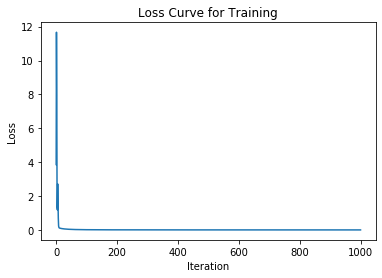

In [29]:
# Plot loss 

nn2.plot_loss()

In [30]:
# Use models to predict

train_pred = nn2.predict(Xtrain)
test_pred = nn2.predict(Xtest)

In [31]:
# Get accuracy of predictions

print("Train accuracy is {}%".format(nn2.accuracy(ytrain, train_pred)))
print("Test accuracy is {}%".format(nn2.accuracy(ytest, test_pred)))

Train accuracy is 100%
Test accuracy is 100%
